In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy import stats

In [2]:
df1_1 = pd.read_excel('CSI300_day_1.xlsx')
df1_2 = pd.read_excel('CSI300_day_2.xlsx')

C:\Users\arknight\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df1 = pd.concat([df1_1,df1_2],axis=0,ignore_index=True)
df1 = df1.drop((df1[df1.Indexcd.str[0]=='没']).index,axis=0)
df1 = df1.drop((df1[df1.Indexcd.str[0]=='交']).index,axis=0)
df1=df1.reset_index(drop=True)
df1 = df1.drop(['Indexcd'],axis =1)
df1['Idxtrd08'] = df1['Idxtrd08']/100
df1.head()

,Idxtrd01,Idxtrd08
0,2015-01-05,0.030516
1,2015-01-06,-0.000132
2,2015-01-07,0.00075
3,2015-01-08,-0.023199
4,2015-01-09,-0.003522


Text(0.5, 1.0, 'CSI300 daily')

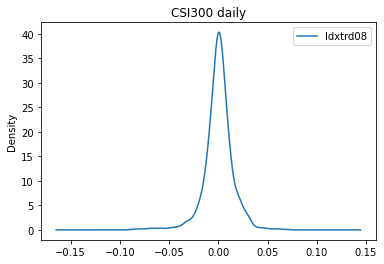

In [4]:
df1.plot.kde()
plt.title('CSI300 daily')

In [5]:
mean = df1.Idxtrd08.mean()
std = df1.Idxtrd08.std()
df1['Idxtrd08'] = df1['Idxtrd08'].astype('float')
df1_ks = stats.kstest(df1['Idxtrd08'],'norm',(mean,std))
df1_ks

KstestResult(statistic=0.09449781250299322, pvalue=1.0577141256422706e-13)

In [6]:
df1_no = stats.normaltest(df1['Idxtrd08'])
df1_no

NormaltestResult(statistic=364.0772642543762, pvalue=8.742317479313932e-80)

In [7]:
df2_1 = pd.read_excel('GEI_day_1.xlsx')
df2_2 = pd.read_excel('GEI_day_2.xlsx')

C:\Users\arknight\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [8]:
df2 = pd.concat([df2_1,df2_2],axis=0,ignore_index=True)
df2 = df2.drop((df2[df2.Indexcd.str[0]=='没']).index,axis=0)
df2 = df2.drop((df2[df2.Indexcd.str[0]=='交']).index,axis=0)
df2=df2.reset_index(drop=True)
df2 = df2.drop(['Indexcd'],axis =1)
df2['Idxtrd08'] = df2['Idxtrd08']/100
df2.head()

,Idxtrd01,Idxtrd08
0,2015-01-05,-0.004749
1,2015-01-06,0.051239
2,2015-01-07,-0.010677
3,2015-01-08,0.012144
4,2015-01-09,0.007362


Text(0.5, 1.0, 'GEI daily')

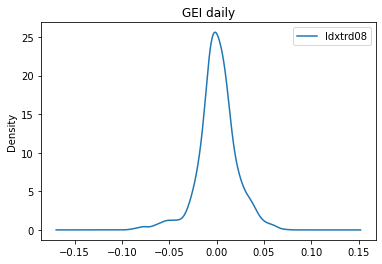

In [9]:
df2.plot.kde()
plt.title('GEI daily')

In [10]:
mean = df2.Idxtrd08.mean()
std = df2.Idxtrd08.std()
df2['Idxtrd08'] = df2['Idxtrd08'].astype('float')
df2_ks = stats.kstest(df2['Idxtrd08'],'norm',(mean,std))
df2_ks

KstestResult(statistic=0.08044533008400279, pvalue=4.800181760121311e-10)

In [11]:
df2_no = stats.normaltest(df2['Idxtrd08'])
df2_no

NormaltestResult(statistic=145.28346728896884, pvalue=2.8320174324114613e-32)

In [12]:
df3_1 = pd.read_excel('CSI300_day_1.xlsx')
df3_2 = pd.read_excel('CSI300_day_2.xlsx')

C:\Users\arknight\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [13]:
df3 = pd.concat([df3_1,df3_2],axis=0,ignore_index=True)
df3 = df3.drop((df3[df3.Indexcd.str[0]=='没']).index,axis=0)
df3 = df3.drop((df3[df3.Indexcd.str[0]=='交']).index,axis=0)
df3 = df3.reset_index(drop=True)
df3 = df3.drop(['Indexcd'],axis =1)
df3.head()

,Idxtrd01,Idxtrd08
0,2015-01-05,3.0516
1,2015-01-06,-0.0132
2,2015-01-07,0.075
3,2015-01-08,-2.3199
4,2015-01-09,-0.3522


In [14]:
df3['month'] =df3['Idxtrd01'].astype('datetime64[ns]')
df3['Idxtrd08'] = df3['Idxtrd08']/100
df3

,Idxtrd01,Idxtrd08,month
0,2015-01-05,0.030516,2015-01-05
1,2015-01-06,-0.000132,2015-01-06
2,2015-01-07,0.00075,2015-01-07
3,2015-01-08,-0.023199,2015-01-08
4,2015-01-09,-0.003522,2015-01-09
...,...,...,...
1700,2021-12-27,-0.000411,2021-12-27
1701,2021-12-28,0.007448,2021-12-28
1702,2021-12-29,-0.014626,2021-12-29
1703,2021-12-30,0.007788,2021-12-30


In [15]:
date_range = pd.date_range(start = "20150105 ", end = "20220102", freq='D')
df3 = df3.set_index('month').reindex(index = date_range)
df3

,Idxtrd01,Idxtrd08
2015-01-05,2015-01-05,0.030516
2015-01-06,2015-01-06,-0.000132
2015-01-07,2015-01-07,0.00075
2015-01-08,2015-01-08,-0.023199
2015-01-09,2015-01-09,-0.003522
...,...,...
2021-12-29,2021-12-29,-0.014626
2021-12-30,2021-12-30,0.007788
2021-12-31,2021-12-31,0.003833
2022-01-01,NaN,NaN


In [16]:
df3 = df3.drop(['Idxtrd01'],axis = 1)
df3 = df3.fillna(0)
df3['Idxtrd08+1'] = df3['Idxtrd08']+1
df3 = df3.drop(['Idxtrd08'],axis = 1)
df3 = df3.resample('W').prod()
df3['Idxtrd'] = df3['Idxtrd08+1'] - 1
df3 = df3.drop(['Idxtrd08+1'],axis = 1)
df3

,Idxtrd
2015-01-11,0.003684
2015-01-18,0.024930
2015-01-25,-0.017444
2015-02-01,-0.038452
2015-02-08,-0.035514
...,...
2021-12-05,0.008414
2021-12-12,0.031442
2021-12-19,-0.019853
2021-12-26,-0.006745


Text(0.5, 1.0, 'CSI300 weekly')

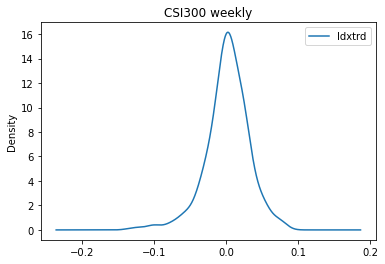

In [17]:
df3.plot.kde()
plt.title('CSI300 weekly')

In [18]:
mean = df3.Idxtrd.mean()
std = df3.Idxtrd.std()
df3['Idxtrd'] = df3['Idxtrd'].astype('float')
df3_ks = stats.kstest(df3['Idxtrd'],'norm',(mean,std))
df3_ks

KstestResult(statistic=0.08242309360337113, pvalue=0.01322443716556142)

In [19]:
df3_no = stats.normaltest(df3['Idxtrd'])
df3_no

NormaltestResult(statistic=51.05686080796963, pvalue=8.187353534978156e-12)

In [20]:
df4_1 = pd.read_excel('GEI_day_1.xlsx')
df4_2 = pd.read_excel('GEI_day_2.xlsx')

C:\Users\arknight\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [21]:
df4 = pd.concat([df4_1,df4_2],axis=0,ignore_index=True)
df4 = df4.drop((df4[df4.Indexcd.str[0]=='没']).index,axis=0)
df4 = df4.drop((df4[df4.Indexcd.str[0]=='交']).index,axis=0)
df4 = df4.reset_index(drop=True)
df4 = df4.drop(['Indexcd'],axis =1)
df4.head()

,Idxtrd01,Idxtrd08
0,2015-01-05,-0.4749
1,2015-01-06,5.1239
2,2015-01-07,-1.0677
3,2015-01-08,1.2144
4,2015-01-09,0.7362


In [22]:
df4['month'] =df4['Idxtrd01'].astype('datetime64[ns]')
df4['Idxtrd08'] = df4['Idxtrd08']/100
df4

,Idxtrd01,Idxtrd08,month
0,2015-01-05,-0.004749,2015-01-05
1,2015-01-06,0.051239,2015-01-06
2,2015-01-07,-0.010677,2015-01-07
3,2015-01-08,0.012144,2015-01-08
4,2015-01-09,0.007362,2015-01-09
...,...,...,...
1700,2021-12-27,-0.000999,2021-12-27
1701,2021-12-28,0.010549,2021-12-28
1702,2021-12-29,-0.014019,2021-12-29
1703,2021-12-30,0.012462,2021-12-30


In [23]:
date_range = pd.date_range(start = "20150105 ", end = "20220102", freq='D')
df4 = df4.set_index('month').reindex(index = date_range)
df4

,Idxtrd01,Idxtrd08
2015-01-05,2015-01-05,-0.004749
2015-01-06,2015-01-06,0.051239
2015-01-07,2015-01-07,-0.010677
2015-01-08,2015-01-08,0.012144
2015-01-09,2015-01-09,0.007362
...,...,...
2021-12-29,2021-12-29,-0.014019
2021-12-30,2021-12-30,0.012462
2021-12-31,2021-12-31,-0.000037
2022-01-01,NaN,NaN


In [24]:
df4 = df4.drop(['Idxtrd01'],axis = 1)
df4 = df4.fillna(0)
df4['Idxtrd08+1'] = df4['Idxtrd08']+1
df4 = df4.drop(['Idxtrd08'],axis = 1)
df4 = df4.resample('W').prod()
df4['Idxtrd'] = df4['Idxtrd08+1'] - 1
df4 = df4.drop(['Idxtrd08+1'],axis = 1)
df4

,Idxtrd
2015-01-11,0.055359
2015-01-18,0.055571
2015-01-25,0.035213
2015-02-01,-0.009844
2015-02-08,0.029982
...,...
2021-12-05,0.002824
2021-12-12,-0.003413
2021-12-19,-0.009362
2021-12-26,-0.039959


Text(0.5, 1.0, 'GEI weekly')

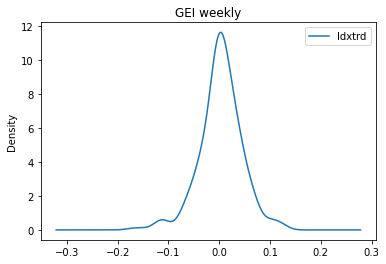

In [25]:
df4.plot.kde()
plt.title('GEI weekly')

In [26]:
mean = df4.Idxtrd.mean()
std = df4.Idxtrd.std()
df4['Idxtrd'] = df4['Idxtrd'].astype('float')
df4_ks = stats.kstest(df4['Idxtrd'],'norm',(mean,std))
df4_ks

KstestResult(statistic=0.07912603420279801, pvalue=0.01957000284785256)

In [27]:
df4_no = stats.normaltest(df4['Idxtrd'])
df4_no

NormaltestResult(statistic=27.09617266900601, pvalue=1.3065946168671162e-06)

In [28]:
df5 = pd.read_excel('CSI300_month.xlsx')
df5 = df5.drop((df5[df5.Indexcd.str[0]=='没']).index,axis=0)
df5 = df5.drop((df5[df5.Indexcd.str[0]=='指']).index,axis=0)
df5 = df5.reset_index(drop=True)
df5 = df5.drop(['Indexcd'],axis =1)
df5.head()

C:\Users\arknight\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Month,Idxrtn
0,2015-01,-0.028105
1,2015-02,0.040314
2,2015-03,0.133888
3,2015-04,0.172463
4,2015-05,0.019146


Text(0.5, 1.0, 'CSI300 monthly')

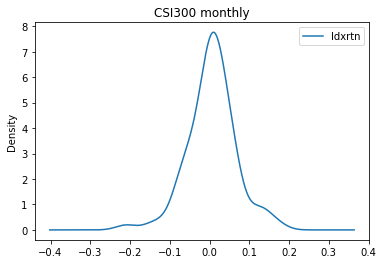

In [29]:
df5.plot.kde()
plt.title('CSI300 monthly')

In [30]:
mean = df5.Idxrtn.mean()
std = df5.Idxrtn.std()
df5['Idxrtn'] = df5['Idxrtn'].astype('float')
df5_ks = stats.kstest(df5['Idxrtn'],'norm',(mean,std))
df5_ks

KstestResult(statistic=0.08970007633094412, pvalue=0.48116541393551715)

In [31]:
df5_no = stats.normaltest(df5['Idxrtn'])
df5_no

NormaltestResult(statistic=7.752625151483928, pvalue=0.02072711410380474)

In [32]:
df6 = pd.read_excel('GEI_month.xlsx')
df6 = df6.drop((df6[df6.Indexcd.str[0]=='没']).index,axis=0)
df6 = df6.drop((df6[df6.Indexcd.str[0]=='指']).index,axis=0)
df6 = df6.reset_index(drop=True)
df6 = df6.drop(['Indexcd'],axis =1)
df6.head()

C:\Users\arknight\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Month,Idxrtn
0,2015-01,0.141881
1,2015-02,0.147249
2,2015-03,0.211161
3,2015-04,0.223846
4,2015-05,0.239671


Text(0.5, 1.0, 'GEI monthly')

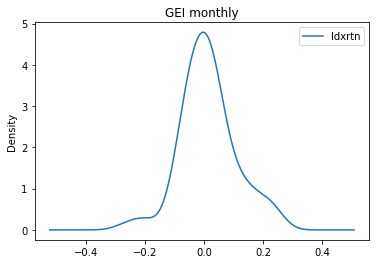

In [33]:
df6.plot.kde()
plt.title('GEI monthly')

In [34]:
mean = df6.Idxrtn.mean()
std = df6.Idxrtn.std()
df6['Idxrtn'] = df6['Idxrtn'].astype('float')
df6_ks = stats.kstest(df6['Idxrtn'],'norm',(mean,std))
df6_ks

KstestResult(statistic=0.10452980432854908, pvalue=0.29669044623544827)

In [35]:
df6_no = stats.normaltest(df6['Idxrtn'])
df6_no

NormaltestResult(statistic=3.3913377534503892, pvalue=0.18347646483828906)